In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성 (클래스 약간 겹치게)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=1.0, random_state=42)

# 정규화
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
from sklearn.svm import SVC

def plot_svm_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))

    # 결정 경계 시각화를 위한 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 및 마진 시각화
    plt.contourf(xx, yy, Z > 0, alpha=0.2, cmap='bwr')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # 데이터 포인트 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=70)

    # 서포트 벡터 시각화
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### Hard Margin vs Soft Margin

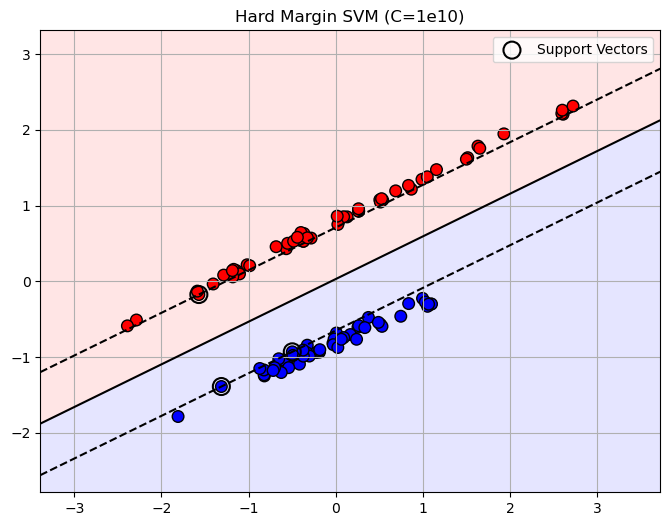

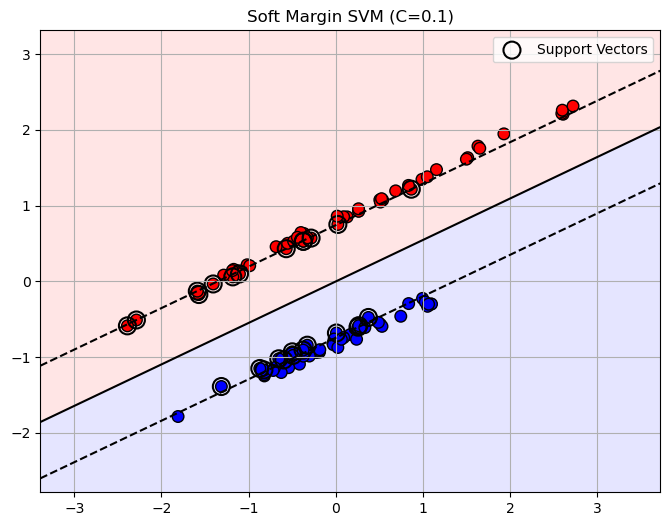

In [10]:
# Hard Margin SVM (C 값을 매우 크게 설정하여 오차를 허용하지 않음)
hard_svm = SVC(kernel='linear', C=1e10)
hard_svm.fit(X_std, y)
plot_svm_decision_boundary(X_std, y, hard_svm, "Hard Margin SVM (C=1e10)")

# Soft Margin SVM (C 값을 작게 설정하여 오차를 허용)
soft_svm = SVC(kernel='linear', C=0.1)
soft_svm.fit(X_std, y)
plot_svm_decision_boundary(X_std, y, soft_svm, "Soft Margin SVM (C=0.1)")

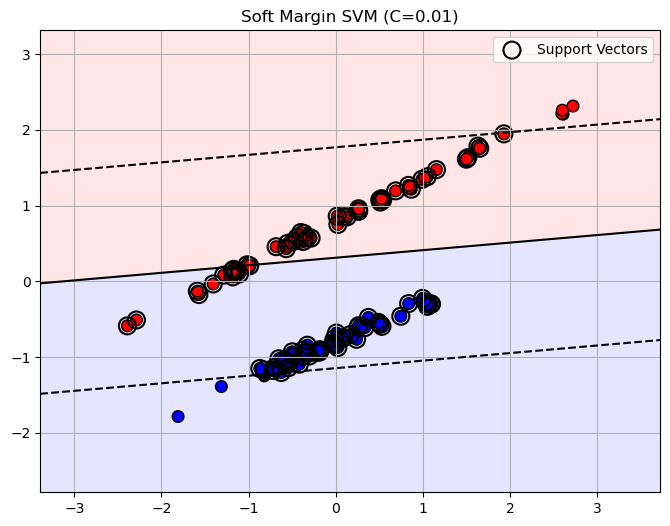

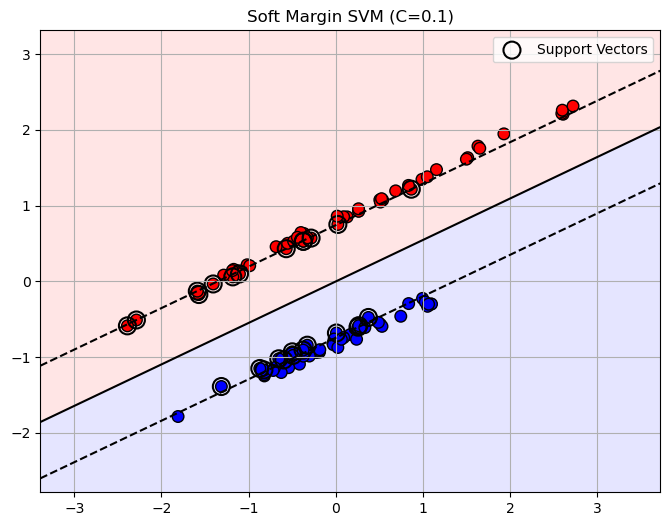

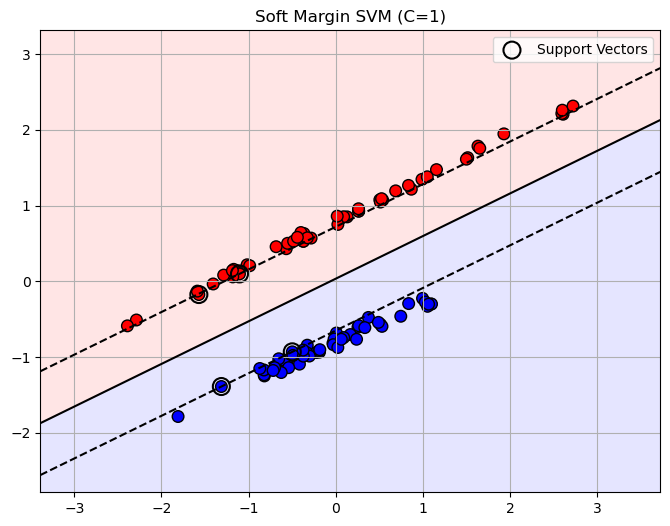

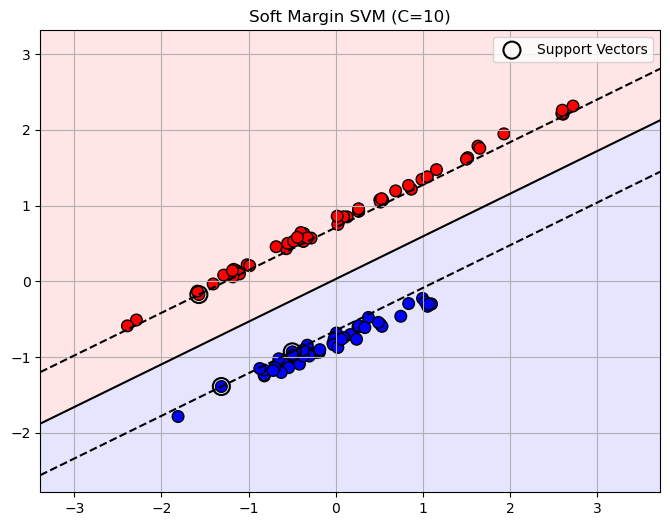

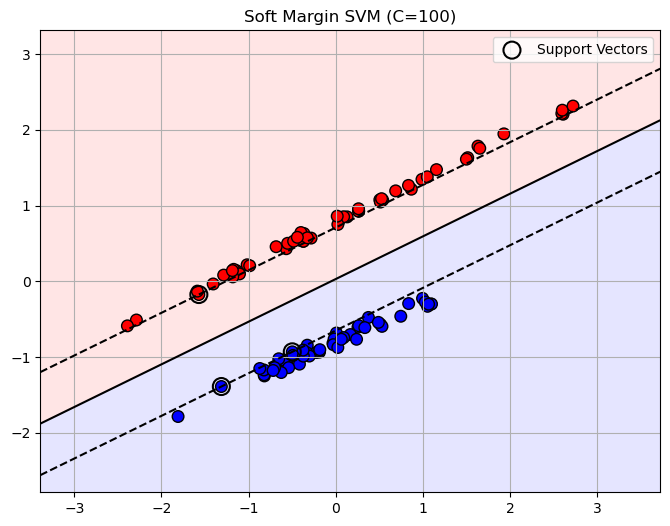

In [12]:
for C_val in [0.01, 0.1, 1, 10, 100]:
    model = SVC(kernel='linear', C=C_val)
    model.fit(X_std, y)
    plot_svm_decision_boundary(X_std, y, model, f"Soft Margin SVM (C={C_val})")